## Overview

   This notebook will introduce the prediction problem that will be answered.  In addition, hypotheses will be made in order to aid in solving the problem as well as to start brewing insights on how to solve the problem.  The importance of solving the problem and how a company can use the resulting information will be looked at.  Finally, the data wrangling process will be conducted in order to clean the data set for future analysis. 
   
   
## Predicting the Likelihood of Acceptance for an H1B-LCA application
 
An H1B visa is a non-immigrant visa that allows foreign born workers to enter the United States and work temporarily for up to three years with a possibility of extension for up to 6 years.  In order for a worker to receive an H1B visa, an employer must offer them a position and then submit an H1B visa application with the Department of Immigration.  H1B visas are commonly applied to by international students are who are looking to work after completing their education in the United States.

A preliminary step before an H1B application can be filed is the submission of the LCA (Labor Condition Application) to the Department of Labor.  The LCA contains information about the job title being offered, duration of the job, whether job is full time, rate of pay, location of the job, and the prevailing wage in the area.  The purpose of the LCA is to bind the employer to agree to pay a fair wage and provide benefits to a foreign born worker that are equal to the prevailing wage and benefits at that occupation’s location.  In addition, the employer should provide the same working conditions to H1B applicants as other workers under the LCA application.  

The data set contains one year worth of data from fiscal year 2017 and approximately 625,000 records of H1B-LCA application results.  I want to prevent employers from having their LCA application denied by identifying and communicating to the employer what the employment characteristics are for a high acceptance rate and low acceptance rate.  If the reason an application is denied is mainly due to the fields defined by the employer such as wage offered or worksite location, the employer will know what to change in their application in order to be certified.  The reason for H1B-LCA denial cannot be due to the employee because the application does not contain any information about the employee, only the employer.  In addition, I will be able to predict whether an employer’s prospective employee will have the LCA approved so that the employer can focus their time on changing characteristics about the job offered or the company so that an H1B-LCA is approved. 

My client is any company that wishes to hire a foreign born worker.  The client should care about H1B-LCA outcomes because they do not want to spend time filing and looking for candidates that will eventually not be certified with a successful H1B LCA application.  Based on my analysis, the employer will be able to find workers that are likely to be H1B-LCA certified by changing characterisitcs about the job offered to characteristics that have a high H1B-LCA certification rate.  

Initial hypotheses for a H1B-LCA application denial include the employer name, the job title, whether the job is part time or not, the difference between the prevailing wage and the wage offered by the employer, whether the employer is H1-B dependent, whether the employer is a willful violator,  and whether the employer agreed to the labor condition agreement subsection on the application.  A large difference between prevailing wage and wage offered means the employer is not giving a fair wage which could cause the application to be denied.  An employer having too many H1-B employees, being a willful violator, or not agreeing to the labor condition agreement are all signs for an application possibly recieving a denied status. 

## Data Wrangling

   The first step to examining the data involves data wrangling or the process of converting the data into a more valuable format that can be used for analysis.  The current data set was obtained from, https://www.foreignlaborcert.doleta.gov/performancedata.cfm.  The data set contains H1B-LCA application data from the 2017 fiscal year.  
   
   The data wrangling for this data set can be split into and defined by these four steps: deletion of unecessary columns, modification of rows that contain missing values, modification of rows with incorrect characters that do not represent the field correctly, and checking for outlier values.

First, the data set needs to be uploaded into a pandas dataframe so that data wrangling can start.  In order for pandas to read the .xslx file, the file was converted to a csv file and encoded to utf-8.  

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

import pandas as pd




df = pd.read_csv('H1B1.csv', low_memory=False)



FileNotFoundError: File b'H1B1.csv' does not exist

Every column of the dataframe is shown below without hiding columns so that every column can be seen.

In [43]:
pd.set_option('display.max_columns', None)
print(df.head(2))

          CASE_NUMBER          CASE_STATUS CASE_SUBMITTED DECISION_DATE  \
0  I-200-16055-173457  CERTIFIED-WITHDRAWN      2/24/2016     10/1/2016   
1  I-200-16064-557834  CERTIFIED-WITHDRAWN       3/4/2016     10/1/2016   

  VISA_CLASS EMPLOYMENT_START_DATE EMPLOYMENT_END_DATE  \
0       H-1B             8/10/2016           8/10/2019   
1       H-1B             8/16/2016           8/16/2019   

            EMPLOYER_NAME EMPLOYER_BUSINESS_DBA     EMPLOYER_ADDRESS  \
0  DISCOVER PRODUCTS INC.                   NaN  2500 LAKE COOK ROAD   
1        DFS SERVICES LLC                   NaN  2500 LAKE COOK ROAD   

  EMPLOYER_CITY EMPLOYER_STATE EMPLOYER_POSTAL_CODE          EMPLOYER_COUNTRY  \
0    RIVERWOODS             IL                60015  UNITED STATES OF AMERICA   
1    RIVERWOODS             IL                60015  UNITED STATES OF AMERICA   

  EMPLOYER_PROVINCE EMPLOYER_PHONE EMPLOYER_PHONE_EXT  \
0               NaN     2244050900                NaN   
1               NaN     

The unecessary columns that do not help us with exploratory data analysis or answering the overall question of predicting the likelihood of an accepted application will be removed.  A justification will be provided for each field deletion so that columns with vital information are not mistakenly taken out.  

In [44]:
df.columns
#df.drop(['CASE_NUMBER'], axis = 1, inplace = True) #The case number is an arbitrary string that does not affect application outcome
df.drop(['DECISION_DATE'], axis = 1, inplace = True)  #The decision date is arrived at by the U.S. Department of Labor not by the applicant 
df.drop(['EMPLOYER_BUSINESS_DBA'], axis=1, inplace=True)  #The official employer is already listed, the unofficial name is unecessary
df.drop(['EMPLOYER_PHONE'], axis=1, inplace=True) #The employer phone is not a variable that affects the application outcome
df.drop(['EMPLOYER_PHONE_EXT'], axis=1, inplace=True) #The employer phone extension is not a variable that affects the application outcome
df.drop(['AGENT_ATTORNEY_CITY'], axis=1, inplace=True) #The attorney's city is not of relevance to the LCA applicant
df.drop(['AGENT_ATTORNEY_STATE'], axis=1, inplace=True) #The attorney's state is not relevant to the LCA applicant
df.drop(['ORIGINAL_CERT_DATE'], axis=1, inplace=True) #This date is a decision made by the Department of Labor not applicant
df.drop(['PUBLIC_DISCLOSURE_LOCATION'], axis=1, inplace=True) #Generic information that does not add any new information
#df.drop(['PW_WAGE_LEVEL'], axis=1, inplace=True) #Wage is already listed, wage level does not provide any new information
#df.drop(['PW_SOURCE_OTHER'], axis=1, inplace=True) #The source of prevailing wage is not affecting status of LCA application
df.drop(['EMPLOYER_PROVINCE'], axis=1, inplace=True) #The province is incorrectly listed or not listed in many rows and provides no new information.



Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS',
       'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',

There are 624,650 rows in the data set.  A lot of these rows contain missing values.  When all rows with any missing values are deleted, only 98,155 rows remain.  Therefore, one should be cautious before deciding to remove rows based on missing values.  A missing value can be due to two reasons, the applicant filling out the H1B-LCA application chose not to input a value or the mechanism by which the data set was created contained scraping errors that resulted in only some values being picked up.  After reviewing the Office of Foreign Labor Certification’s iCERT Visa Portal System, where the application is filled out, it is clear based on the application instructions, that all the fields in the application are discretionary, meaning the applicant did not have to enter a value if they did not want to.  Because missing values are due to the optional nature of the application, having a missing value may affect application outcome.  Removing rows with missing values may skew the data set towards accepted applications because denied applications would be filtered out by removing rows with missing values in certain columns.  Therefore no columns in the H1B-LCA application data set will have the entries for their corresponding missing values removed.  In many cases, missing values will be imputed or labeled to signify there is exists a missing value at that position.  


The code below finds all the columns that have an missing value.  

In [45]:
columns=df.columns[df.isna().any()].tolist()
columns

['EMPLOYMENT_START_DATE',
 'EMPLOYMENT_END_DATE',
 'EMPLOYER_NAME',
 'EMPLOYER_ADDRESS',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE',
 'EMPLOYER_POSTAL_CODE',
 'EMPLOYER_COUNTRY',
 'AGENT_REPRESENTING_EMPLOYER',
 'JOB_TITLE',
 'SOC_CODE',
 'SOC_NAME',
 'NAICS_CODE',
 'FULL_TIME_POSITION',
 'PREVAILING_WAGE',
 'PW_UNIT_OF_PAY',
 'PW_WAGE_LEVEL',
 'PW_SOURCE',
 'PW_SOURCE_YEAR',
 'PW_SOURCE_OTHER',
 'WAGE_RATE_OF_PAY_TO',
 'WAGE_UNIT_OF_PAY',
 'H1B_DEPENDENT',
 'WILLFUL_VIOLATOR',
 'SUPPORT_H1B',
 'LABOR_CON_AGREE',
 'WORKSITE_CITY',
 'WORKSITE_COUNTY',
 'WORKSITE_STATE',
 'WORKSITE_POSTAL_CODE']

Before dealing with imputing a value for the missing values, the frequency of the ten most common values in a field with missing values along with the number of missing values will be computed.  This will serve to understand how many values in a field are null compared to the top values in the field.  In essence, it will be known which fields employers choose not fill in the most based on the null value count.  



In [46]:
print('Top values in the Employment Start Date field')
df['EMPLOYMENT_START_DATE'].value_counts()[:11]
print('The number of null values in the employment start date column is: ' + str(df['EMPLOYMENT_START_DATE'].isnull().sum()))

print('Top values in the Employment End Date field')
df['EMPLOYMENT_END_DATE'].value_counts()[:11]
print('The number of null values in the employment end date column is: ' + str(df['EMPLOYMENT_END_DATE'].isnull().sum()))

print('Top values in the Employer Name field')
df['EMPLOYER_NAME'].value_counts()[:11]
print('The number of null values in the employmer name column is: ' + str(df['EMPLOYER_NAME'].isnull().sum()))

print('Top values in the Employer Address field')
df['EMPLOYER_ADDRESS'].value_counts()[:11]
print('The number of null values in the employmer address column is: ' + str(df['EMPLOYER_ADDRESS'].isnull().sum()))

print('Top values in the Employer City field')
df['EMPLOYER_CITY'].value_counts()[:11]
print('The number of null values in the employmer city column is: ' + str(df['EMPLOYER_CITY'].isnull().sum()))

print('Top values in the Employer State field')
df['EMPLOYER_STATE'].value_counts()[:11]
print('The number of null values in the employmer state column is: ' + str(df['EMPLOYER_STATE'].isnull().sum()))

print('Top values in the Employer Postal Code field')
df['EMPLOYER_POSTAL_CODE'].value_counts()[:11]
print('The number of null values in the employmer postal code column is: ' + str(df['EMPLOYER_POSTAL_CODE'].isnull().sum()))

print('Top values in the Employer Country field')
df['EMPLOYER_COUNTRY'].value_counts()[:11]
print('The number of null values in the employmer country column is: ' + str(df['EMPLOYER_COUNTRY'].isnull().sum()))

print('Top values in the Attorney field')
df['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:11]
print('The number of null values in the attorney name column is: ' + str(df['AGENT_REPRESENTING_EMPLOYER'].isnull().sum()))

print('Top values in the Job Title field')
df['JOB_TITLE'].value_counts()[:11]
print('The number of null values in the job title column is: ' + str(df['JOB_TITLE'].isnull().sum()))

print('Top values in the Occupation Code field')
df['SOC_NAME'].value_counts()[:11]
print('The number of null values in the occupation code column is: ' + str(df['SOC_NAME'].isnull().sum()))

print('Top values in the Industry Code field')
df['NAICS_CODE'].value_counts()[:11]
print('The number of null values in the industry code column is: ' + str(df['NAICS_CODE'].isnull().sum()))

print('Top values in the Full Time Position field')
df['FULL_TIME_POSITION'].value_counts()[:11]
print('The number of null values in the full time position column is: ' + str(df['FULL_TIME_POSITION'].isnull().sum()))

print('Top values in the Prevailing Wage field')
df['PREVAILING_WAGE'].value_counts()[:11]
print('The number of null values in the prevailing wage column is: ' + str(df['PREVAILING_WAGE'].isnull().sum()))

print('Top values in the PW Unit field')
df['PW_UNIT_OF_PAY'].value_counts()[:11]
print('The number of null values in the PW unit column is: ' + str(df['PW_UNIT_OF_PAY'].isnull().sum()))

print('Top values in the PW Source field')
df['PW_SOURCE'].value_counts()[:11]
print('The number of null values in the PW source column is: ' + str(df['PW_SOURCE'].isnull().sum()))

print('Top values in the PW Source Year field')
df['PW_SOURCE_YEAR'].value_counts()
print('The number of null values in the PW source year column is: ' + str(df['PW_SOURCE_YEAR'].isnull().sum()))

print('Top values in the Maximum Wage Offered field')
df['WAGE_RATE_OF_PAY_TO'].value_counts()[:11]
print('The number of null values in the maximum wage offered column is: ' + str(df['WAGE_RATE_OF_PAY_TO'].isnull().sum()))

print('Top values in the Wage Offered Unit field')
df['WAGE_UNIT_OF_PAY'].value_counts()[:11]
print('The number of null values in the wage offered unit column is: ' + str(df['WAGE_UNIT_OF_PAY'].isnull().sum()))

print('Top values in the H1B Dependent field')
df['H1B_DEPENDENT'].value_counts()[:11]
print('The number of null values in the H1B dependent column is: ' + str(df['H1B_DEPENDENT'].isnull().sum()))

print('Top values in the Willful Violator field')
df['WILLFUL_VIOLATOR'].value_counts()[:11]
print('The number of null values in the willful violator column is: ' + str(df['WILLFUL_VIOLATOR'].isnull().sum()))

print('Top values in the Support H1B field')
df['SUPPORT_H1B'].value_counts()[:11]
print('The number of null values in the support H1B column is: ' + str(df['SUPPORT_H1B'].isnull().sum()))

print('Top values in the Labor Condition Agreement field')
df['LABOR_CON_AGREE'].value_counts()[:11]
print('The number of null values in the labor condition agreement column is: ' + str(df['LABOR_CON_AGREE'].isnull().sum()))

print('Top values in the Worksite City field')
df['WORKSITE_CITY'].value_counts()[:11]
print('The number of null values in the worksite city column is: ' + str(df['WORKSITE_CITY'].isnull().sum()))

print('Top values in the Worksite County field')
df['WORKSITE_COUNTY'].value_counts()[:11]
print('The number of null values in the worksite county column is: ' + str(df['WORKSITE_COUNTY'].isnull().sum()))

print('Top values in the Worksite State field')
df['WORKSITE_STATE'].value_counts()[:11]
print('The number of null values in the worksite state column is: ' + str(df['WORKSITE_STATE'].isnull().sum()))

print('Top values in the Worksite Postal Code field')
df['WORKSITE_POSTAL_CODE'].value_counts()[:11]
print('The number of null values in the worksite postal code is: ' + str(df['WORKSITE_POSTAL_CODE'].isnull().sum()))



Top values in the Employment Start Date field


9/1/2017     28425
8/1/2017     12984
9/15/2017    11067
10/1/2017    10215
7/1/2017      9110
9/5/2017      8402
9/12/2017     7238
9/13/2017     6954
8/15/2017     6739
9/8/2017      6643
9/16/2017     6568
Name: EMPLOYMENT_START_DATE, dtype: int64

The number of null values in the employment start date column is: 29
Top values in the Employment End Date field


8/31/2020    17753
9/1/2020     13063
7/31/2020     9137
9/14/2020     9038
9/15/2020     8333
8/15/2020     7721
9/30/2020     7432
9/12/2020     6924
9/5/2020      6839
9/4/2020      6742
6/30/2020     6556
Name: EMPLOYMENT_END_DATE, dtype: int64

The number of null values in the employment end date column is: 30
Top values in the Employer Name field


INFOSYS LIMITED                      20587
TATA CONSULTANCY SERVICES LIMITED    13529
CAPGEMINI AMERICA INC                 9604
IBM INDIA PRIVATE LIMITED             8734
TECH MAHINDRA (AMERICAS),INC.         7543
DELOITTE CONSULTING LLP               7179
ACCENTURE LLP                         6690
ERNST & YOUNG U.S. LLP                6096
WIPRO LIMITED                         5177
GOOGLE INC.                           5074
MICROSOFT CORPORATION                 5005
Name: EMPLOYER_NAME, dtype: int64

The number of null values in the employmer name column is: 56
Top values in the Employer Address field


6100 TENNYSON PARKWAY          20748
9201 CORPORATE BOULEVARD       13242
1700 MARKET STREET              9775
333 WEST WACKER DRIVE           9714
3039 CORNWALLIS ROAD            8816
4965 PRESTON PARK BOULEVARD     8291
200 PLAZA DRIVE                 6239
2 TOWER CENTER BLVD             5820
161 N. CLARK ST.                5760
525 EAST BIG BEAVER ROAD        5590
1600 AMPHITHEATRE PARKWAY       5356
Name: EMPLOYER_ADDRESS, dtype: int64

The number of null values in the employmer address column is: 7
Top values in the Employer City field


PLANO            34320
NEW YORK         31022
CHICAGO          25581
ROCKVILLE        14499
EDISON           12670
PHILADELPHIA     12057
DURHAM           11638
SAN FRANCISCO    11199
TROY             10938
IRVING           10445
HOUSTON           9795
Name: EMPLOYER_CITY, dtype: int64

The number of null values in the employmer city column is: 15
Top values in the Employer State field


CA    105701
TX     87664
NJ     76061
NY     44097
IL     41296
MI     27320
PA     25564
MA     23383
MD     21394
WA     20786
VA     19374
Name: EMPLOYER_STATE, dtype: int64

The number of null values in the employmer state column is: 18
Top values in the Employer Postal Code field


75024    22815
20850    14287
27709    11473
60606    11023
19103    10411
75093     9269
08817     9169
94043     7837
48083     7759
95054     7594
60601     7527
Name: EMPLOYER_POSTAL_CODE, dtype: int64

The number of null values in the employmer postal code column is: 18
Top values in the Employer Country field


UNITED STATES OF AMERICA    528132
CANADA                           7
AUSTRALIA                        2
CAMBODIA                         1
CHINA                            1
Name: EMPLOYER_COUNTRY, dtype: int64

The number of null values in the employmer country column is: 96507
Top values in the Attorney field


Y    351346
N    176798
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

The number of null values in the attorney name column is: 96506
Top values in the Job Title field


PROGRAMMER ANALYST          47151
SOFTWARE ENGINEER           27950
SOFTWARE DEVELOPER          16107
SYSTEMS ANALYST             10798
BUSINESS ANALYST             7410
COMPUTER PROGRAMMER          7303
SENIOR SOFTWARE ENGINEER     6983
COMPUTER SYSTEMS ANALYST     6555
DEVELOPER                    5835
ASSISTANT PROFESSOR          4957
PROJECT MANAGER              4262
Name: JOB_TITLE, dtype: int64

The number of null values in the job title column is: 5
Top values in the Occupation Code field


SOFTWARE DEVELOPERS, APPLICATIONS              124507
COMPUTER SYSTEMS ANALYSTS                       93611
COMPUTER PROGRAMMERS                            66603
COMPUTER OCCUPATIONS, ALL OTHER                 53440
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE           18401
COMPUTER SYSTEMS ANALYST                        16902
MANAGEMENT ANALYSTS                             13092
ACCOUNTANTS AND AUDITORS                        11889
NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS     10817
MECHANICAL ENGINEERS                             9886
FINANCIAL ANALYSTS                               9633
Name: SOC_NAME, dtype: int64

The number of null values in the occupation code column is: 3
Top values in the Industry Code field


541511    232810
541512     33909
611310     25534
54151      20914
5416       19831
541519     14205
541330     13307
54161       8508
541211      7851
622110      7304
541611      7279
Name: NAICS_CODE, dtype: int64

The number of null values in the industry code column is: 7
Top values in the Full Time Position field


Y    610769
N     13876
Name: FULL_TIME_POSITION, dtype: int64

The number of null values in the full time position column is: 5
Top values in the Prevailing Wage field


68,827.00     3928
55,910.00     3918
62,754.00     3661
64,813.00     3376
70,221.00     3334
46,301.00     2771
75,795.00     2728
106,101.00    2370
90,813.00     2329
84,864.00     2183
71,781.00     2142
Name: PREVAILING_WAGE, dtype: int64

The number of null values in the prevailing wage column is: 1
Top values in the PW Unit field


Year         585301
Hour          38779
Month           327
Week            140
Bi-Weekly        57
Name: PW_UNIT_OF_PAY, dtype: int64

The number of null values in the PW unit column is: 46
Top values in the PW Source field


OES      504806
Other    115702
CBA        4053
DBA          22
SCA          21
Name: PW_SOURCE, dtype: int64

The number of null values in the PW source column is: 46
Top values in the PW Source Year field


2016.0    437864
2017.0    157657
2015.0     17413
2014.0      8236
2013.0      2992
2011.0       241
2012.0       108
2009.0        30
2010.0        19
2008.0        18
2007.0        13
2001.0         5
0.0            2
2000.0         1
1999.0         1
1998.0         1
1993.0         1
1985.0         1
1.0            1
15.0           1
Name: PW_SOURCE_YEAR, dtype: int64

The number of null values in the PW source year column is: 45
Top values in the Maximum Wage Offered field


0.00          488992
87,000.00       4406
100,000.00      3758
120,000.00      3557
90,000.00       2949
110,000.00      2896
94,500.00       2883
88,200.00       2601
70,000.00       2274
95,000.00       2155
75,000.00       2128
Name: WAGE_RATE_OF_PAY_TO, dtype: int64

The number of null values in the maximum wage offered column is: 1
Top values in the Wage Offered Unit field


Year         585417
Hour          38405
Month           502
Week            188
Bi-Weekly       130
Name: WAGE_UNIT_OF_PAY, dtype: int64

The number of null values in the wage offered unit column is: 8
Top values in the H1B Dependent field


N    377051
Y    233857
Name: H1B_DEPENDENT, dtype: int64

The number of null values in the H1B dependent column is: 13742
Top values in the Willful Violator field


N    610428
Y       477
Name: WILLFUL_VIOLATOR, dtype: int64

The number of null values in the willful violator column is: 13745
Top values in the Support H1B field


Y    231915
N      8561
Name: SUPPORT_H1B, dtype: int64

The number of null values in the support H1B column is: 384174
Top values in the Labor Condition Agreement field


Y    233715
N     11260
Name: LABOR_CON_AGREE, dtype: int64

The number of null values in the labor condition agreement column is: 379675
Top values in the Worksite City field


NEW YORK         37722
SAN FRANCISCO    16145
HOUSTON          13416
CHICAGO          11757
ATLANTA          11115
SAN JOSE         10916
IRVING            8818
SEATTLE           8630
SUNNYVALE         8282
DALLAS            8056
MOUNTAIN VIEW     7531
Name: WORKSITE_CITY, dtype: int64

The number of null values in the worksite city column is: 13
Top values in the Worksite County field


SANTA CLARA      41862
NEW YORK         37684
KING             22563
DALLAS           21697
MIDDLESEX        21469
COOK             17641
LOS ANGELES      17411
SAN FRANCISCO    15678
HARRIS           14040
FULTON           13151
SUFFOLK           8796
Name: WORKSITE_COUNTY, dtype: int64

The number of null values in the worksite county column is: 1179
Top values in the Worksite State field


CA    119409
TX     66163
NY     54974
NJ     42571
IL     32082
WA     25476
MA     25016
GA     22521
FL     21815
PA     21600
MI     20222
Name: WORKSITE_STATE, dtype: int64

The number of null values in the worksite state column is: 9
Top values in the Worksite Postal Code field


94043    6683
98052    6487
94105    6065
95054    4810
95134    4304
94085    4037
10036    3892
75024    3658
60606    3593
75038    3174
10017    2830
Name: WORKSITE_POSTAL_CODE, dtype: int64

The number of null values in the worksite postal code is: 19


It is known now how many missing values there are per field.  Now, it must be decided on how to replace these missing values.  If a missing value is a categorical variable, the missing value will be replaced with the string 'None'.  If the missing value is a numerical variable, the missing value will be replaced with an imputed value.  The missing categorical variables will first be replaced with 'None' in the cell below.  

In [47]:
df['EMPLOYMENT_START_DATE'].fillna(value='None', inplace=True)
df['EMPLOYMENT_END_DATE'].fillna(value='None', inplace=True)
df['EMPLOYER_NAME'].fillna(value='None', inplace=True)
df['EMPLOYER_ADDRESS'].fillna(value='None', inplace=True)
df['EMPLOYER_CITY'].fillna(value='None', inplace=True)
df['EMPLOYER_STATE'].fillna(value='None', inplace=True)
df['EMPLOYER_POSTAL_CODE'].fillna(value='None', inplace=True)
df['EMPLOYER_COUNTRY'].fillna(value='None', inplace=True)
df['AGENT_REPRESENTING_EMPLOYER'].fillna(value='None', inplace=True)
df['AGENT_ATTORNEY_NAME'].fillna(value='None', inplace=True)
df['JOB_TITLE'].fillna(value='None', inplace=True)
df['SOC_NAME'].fillna(value='None', inplace=True)
df['NAICS_CODE'].fillna(value='None', inplace=True)
df['FULL_TIME_POSITION'].fillna(value='None', inplace=True)

df['PW_UNIT_OF_PAY'].fillna(value='None', inplace=True)
df['PW_SOURCE'].fillna(value='None', inplace=True)
df['PW_SOURCE_YEAR'].fillna(value='None', inplace=True)
df['PW_WAGE_LEVEL'].fillna(value='None', inplace=True)
df['PW_SOURCE_OTHER'].fillna(value='None', inplace=True)
df['WAGE_UNIT_OF_PAY'].fillna(value='None', inplace=True)
df['H1B_DEPENDENT'].fillna(value='None', inplace=True)
df['WILLFUL_VIOLATOR'].fillna(value='None', inplace=True)
df['SUPPORT_H1B'].fillna(value='None', inplace=True)
df['LABOR_CON_AGREE'].fillna(value='None', inplace=True)
df['WORKSITE_CITY'].fillna(value='None', inplace=True)
df['WORKSITE_COUNTY'].fillna(value='None', inplace=True)
df['WORKSITE_STATE'].fillna(value='None', inplace=True)
df['WORKSITE_POSTAL_CODE'].fillna(value='None', inplace=True)

Now that the entries with missing values in categorical fields have been replaced, values that are irregularities need to be replaced with more understandable notation.  For example in the AGENT_ATTORNEY_NAME field, a comma is in many rows that do not have an attorney name.  The comma can be replaced with the value None so that it is easily identifiable if an application had an attorney or not.  

In [48]:
df['AGENT_ATTORNEY_NAME'] = df['AGENT_ATTORNEY_NAME'].map({',': 'None'}).fillna(df['AGENT_ATTORNEY_NAME'])

Currently, the industry from which the job is in is represented by a NAICS_CODE.  The NAICS code needs to be converted to an industry name.  The following code cell retrieves the corresponding industry name from the 2012_NAICS_Structure.csv and adds codes with titles to a dictionary.  NAICS code values are first replaced in the dataframe with industry names then the codes without an entry in the dictionary are replaced with the string 'None'.  Replacing the numerical codes with industry names is more readable and easy to understand.    

In [49]:
NAICS=pd.read_csv('2012_NAICS_Structure.csv')
NAICS.drop(['2012 NAICS Structure'], axis=1, inplace=True) 
NAICS=NAICS.dropna(subset = ['Unnamed: 1', 'Unnamed: 2'])
NAICS.columns=['2012 NAICS Code', '2012 NAICS Title']
NAICS=NAICS.loc[2:]

naics_dict = dict(zip(NAICS['2012 NAICS Code'], NAICS['2012 NAICS Title']))

for index, row in df.iterrows():     #Iterate through each row in the dataframe
        code=(row['NAICS_CODE'])   #Focus on the NAICS_CODE column
        code=str(code)
        if code not in naics_dict:  #check if code is in dictionary
            df.at[index, 'NAICS_CODE'] = 'None'
        else:
            df.at[index, 'NAICS_CODE'] = naics_dict[code]
            


Next, the case status column will be examined in order to remove irrelevant rows.  The case status column identifies whether or not the H1B-LCA application was certified, denied, withdrawn, or certified-withdraw.  Because the goal is to predict the likelihood of an applicant receiving a certified status, the rows containing applications that were withdrawn can be removed as they give no insight on whether an application was certified or not.  

In [50]:
df = df[df.CASE_STATUS != 'WITHDRAWN']



A possible reason for the declined H1B-LCA application is the difference between the prevailing wage and the wage offered by the employer.  If the wage difference is large, it may be a reason for the application receiving a rejection because a lower wage than the prevailing wage is considered unfair.  The units for the prevailing wage and the offered wage may be in different units such as monthly, hourly, and yearly.  The following script converts the units and the monetary value of the prevailing wage as well as the wage offered by the employer to a yearly unit and the monetary value corresponding to an annual wage.  

Another reason the application could be rejected is that prevailing wage listed is not correctly listed.  By converting all of the salaries to annual salaries, the salaries can be compared to a database with prevailing wage values.

In [51]:
for index, row in df.iterrows():
    row['PREVAILING_WAGE']=str(row['PREVAILING_WAGE']).replace(',','')
    row['WAGE_RATE_OF_PAY_FROM']=str(row['WAGE_RATE_OF_PAY_FROM']).replace(',','')
    if (row['PW_UNIT_OF_PAY']=='Hour'):
        df.at[index, 'PW_UNIT_OF_PAY'] = 'Year'
        df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])*(2080)
    if (row['WAGE_UNIT_OF_PAY']=='Hour'):
        df.at[index, 'WAGE_UNIT_OF_PAY']= 'Year'
        df.at[index, 'WAGE_RATE_OF_PAY_FROM'] = float(row['WAGE_RATE_OF_PAY_FROM'])*(2080) 
    
    if (row['PW_UNIT_OF_PAY']=='Week'):
        df.at[index, 'PW_UNIT_OF_PAY'] = 'Year'
        df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])*(2080/40)
    if (row['WAGE_UNIT_OF_PAY']=='Week'):
        df.at[index, 'WAGE_UNIT_OF_PAY']= 'Year'
        df.at[index, 'WAGE_RATE_OF_PAY_FROM'] = float(row['WAGE_RATE_OF_PAY_FROM'])*(2080/40)  
    if (row['PW_UNIT_OF_PAY']=='Month'):
        df.at[index, 'PW_UNIT_OF_PAY'] = 'Year'
        df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])*(12)
    if (row['WAGE_UNIT_OF_PAY']=='Month'):
        df.at[index, 'WAGE_UNIT_OF_PAY']= 'Year'
        df.at[index, 'WAGE_RATE_OF_PAY_FROM'] = float(row['WAGE_RATE_OF_PAY_FROM'])*(12)
    if (row['PW_UNIT_OF_PAY']=='Bi-Weekly'):
        df.at[index, 'PW_UNIT_OF_PAY'] = 'Year'
        df.at[index, 'PREVAILING_WAGE'] = float(row['PREVAILING_WAGE'])*(2080/80)
    if (row['WAGE_UNIT_OF_PAY']=='Bi-Weekly'):
        df.at[index, 'WAGE_UNIT_OF_PAY'] = 'Year'
        df.at[index, 'WAGE_RATE_OF_PAY_FROM'] = float(row['WAGE_RATE_OF_PAY_FROM'])*(2080/80)
    if (row['PW_UNIT_OF_PAY']=='Year')& (row['WAGE_UNIT_OF_PAY']=='Year'):
        continue    
    

In order to see if there is a discrepancy between the prevailing wage and wage given by the employer, a calculated field is created below that represents the difference between the prevailing wage and wage given by the employer.  

In [52]:
for index, row in df.iterrows():
    df.at[index, 'WAGE_RATE_OF_PAY_FROM'] = float(str(row['WAGE_RATE_OF_PAY_FROM']).replace(',',''))
    df.at[index, 'PREVAILING_WAGE']=float(str(row['PREVAILING_WAGE']).replace(',',''))
df['WAGE_DIFFERENCE'] = df.WAGE_RATE_OF_PAY_FROM.astype(float)-df.PREVAILING_WAGE.astype(float)

Another aspect of data wrangling involves finding the outliers in a field that may lead to faulty analysis later on.  In order to make sure the prevailing wage column and the wage rate offered by the employer contain values that are valid, a scatter plot can be constructed to make sure the salaries fall within a reasonable range.  

The lists for graphing wage offered vs. prevailing wage by different units of time are created in the code below.  

In [53]:
pw_year=[]
wage_year=[]
pw_month=[]
wage_month=[]
pw_week=[]
wage_week=[]
pw_hour=[]
wage_hour=[]
pw_biweekly=[]
wage_biweekly=[]
for index, row in df.iterrows():
    if (row['PW_UNIT_OF_PAY']=='Year') & (row['WAGE_UNIT_OF_PAY']=='Year'):   #Wage w/ units Year
        pw_year.append(row['PREVAILING_WAGE'])
        wage_year.append(row['WAGE_RATE_OF_PAY_FROM'])
    if (row['PW_UNIT_OF_PAY']=='Month') & (row['WAGE_UNIT_OF_PAY']=='Month'): #Wage w/ units Month
        pw_month.append(row['PREVAILING_WAGE'])
        wage_month.append(row['WAGE_RATE_OF_PAY_FROM'])
    if (row['PW_UNIT_OF_PAY']=='Week') & (row['WAGE_UNIT_OF_PAY']=='Week'):  #Wage w/ units Week
        pw_week.append(row['PREVAILING_WAGE'])
        wage_week.append(row['WAGE_RATE_OF_PAY_FROM'])
    if (row['PW_UNIT_OF_PAY']=='Hour') & (row['WAGE_UNIT_OF_PAY']=='Hour'):  #Week w/ units Hour
        pw_hour.append(row['PREVAILING_WAGE'])
        wage_hour.append(row['WAGE_RATE_OF_PAY_FROM'])
    if (row['PW_UNIT_OF_PAY']=='Bi-Weekly') & (row['WAGE_UNIT_OF_PAY']=='Bi-Weekly'):  #Week w/ units Bi-Weekly
        pw_biweekly.append(row['PREVAILING_WAGE'])
        wage_biweekly.append(row['WAGE_RATE_OF_PAY_FROM'])
    
    
%store pw_year
%store wage_year
    




Stored 'pw_year' (list)
Stored 'wage_year' (list)


In the WAGE_RATE_OF_PAY_TO field, many cells have the value 0.00, 448,992 cells have this value to be exact.  This field represents the maximum wage offered by the employer.  0.00 cannot be replaced with 'None' as this field is a numerical variable that cannot be replaced with a categorical variable value.  Instead, the value 0.00 can be repaced with the value in the wage offered column because the employer did not offer a maximum wage and the maximum wage can be substituted with wage offered.  Many employers may not offer a maximum wage because they do not want wage to have a range of values, therefore the wage offered will be used in the cases where WAGE_RATE_OF_PAY_TO is 0.00 or null.  

There is one more field left that is numerical.  It is the prevailing wage field and it only has one entry with a missing value.  The value cannot be replaced with 'None' because the field is a numerical variable.  Therefore, the missing value is replaced with '0.00' because this application was denied and all the other applications that had a prevailing wage of '0.00' the application denied.  By replacing the missing value with '0.00' the application is grouped with other denied applications and maintains its own denied identity.   

Two missing value indicator columns were created in the cell below so that it known if the WAGE_RATE_OF_PAY_TO or the PREVAILING_WAGE columns had a missing value before the missing values were replcaced with another value.  


In [54]:
for index, row in df.iterrows():
    if row['WAGE_RATE_OF_PAY_TO']=='0.00':
        df.at[index, 'WAGE_RATE_OF_PAY_TO'] = row['WAGE_RATE_OF_PAY_FROM']
        
df['MAX_WAGE_INDICATOR'] = df['WAGE_RATE_OF_PAY_TO'].isnull().astype(int)    
missing_maxwage=df[df['WAGE_RATE_OF_PAY_TO'].isnull()] #The offered wage for the entry with a maximum wage value missing is 63,024.00
WAGE_RATE_OF_PAY_FROM='63,024.00'
df['WAGE_RATE_OF_PAY_TO'].fillna(value=WAGE_RATE_OF_PAY_FROM, inplace=True)

df['PREVAILING_WAGE_INDICATOR']=df['PREVAILING_WAGE'].isnull().astype(int)   
df['PREVAILING_WAGE'].fillna(value='0.00', inplace=True)
 




Install plotly graphical visualization tool

In [55]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (3.4.1)
Requirement not upgraded as not directly required: retrying>=1.3.3 in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (1.3.3)
Requirement not upgraded as not directly required: six in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (1.11.0)
Requirement not upgraded as not directly required: pytz in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (2018.4)
Requirement not upgraded as not directly required: nbformat>=4.2 in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (4.4.0)
Requirement not upgraded as not directly required: requests in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (2.18.4)
Requirement not upgraded as not directly required: decorator>=4.0.6 in /Users/sooryapaturi/anaconda3/lib/python3.6/site-packages (from plotly) (4.3.0)
Requirement not upgr

The following code creates a scatter plot showing the relationship between the wage offered by the employer to the prevailing wage for the position.  Any wages that seem unreasonable will have the rows they are contained in removed.  

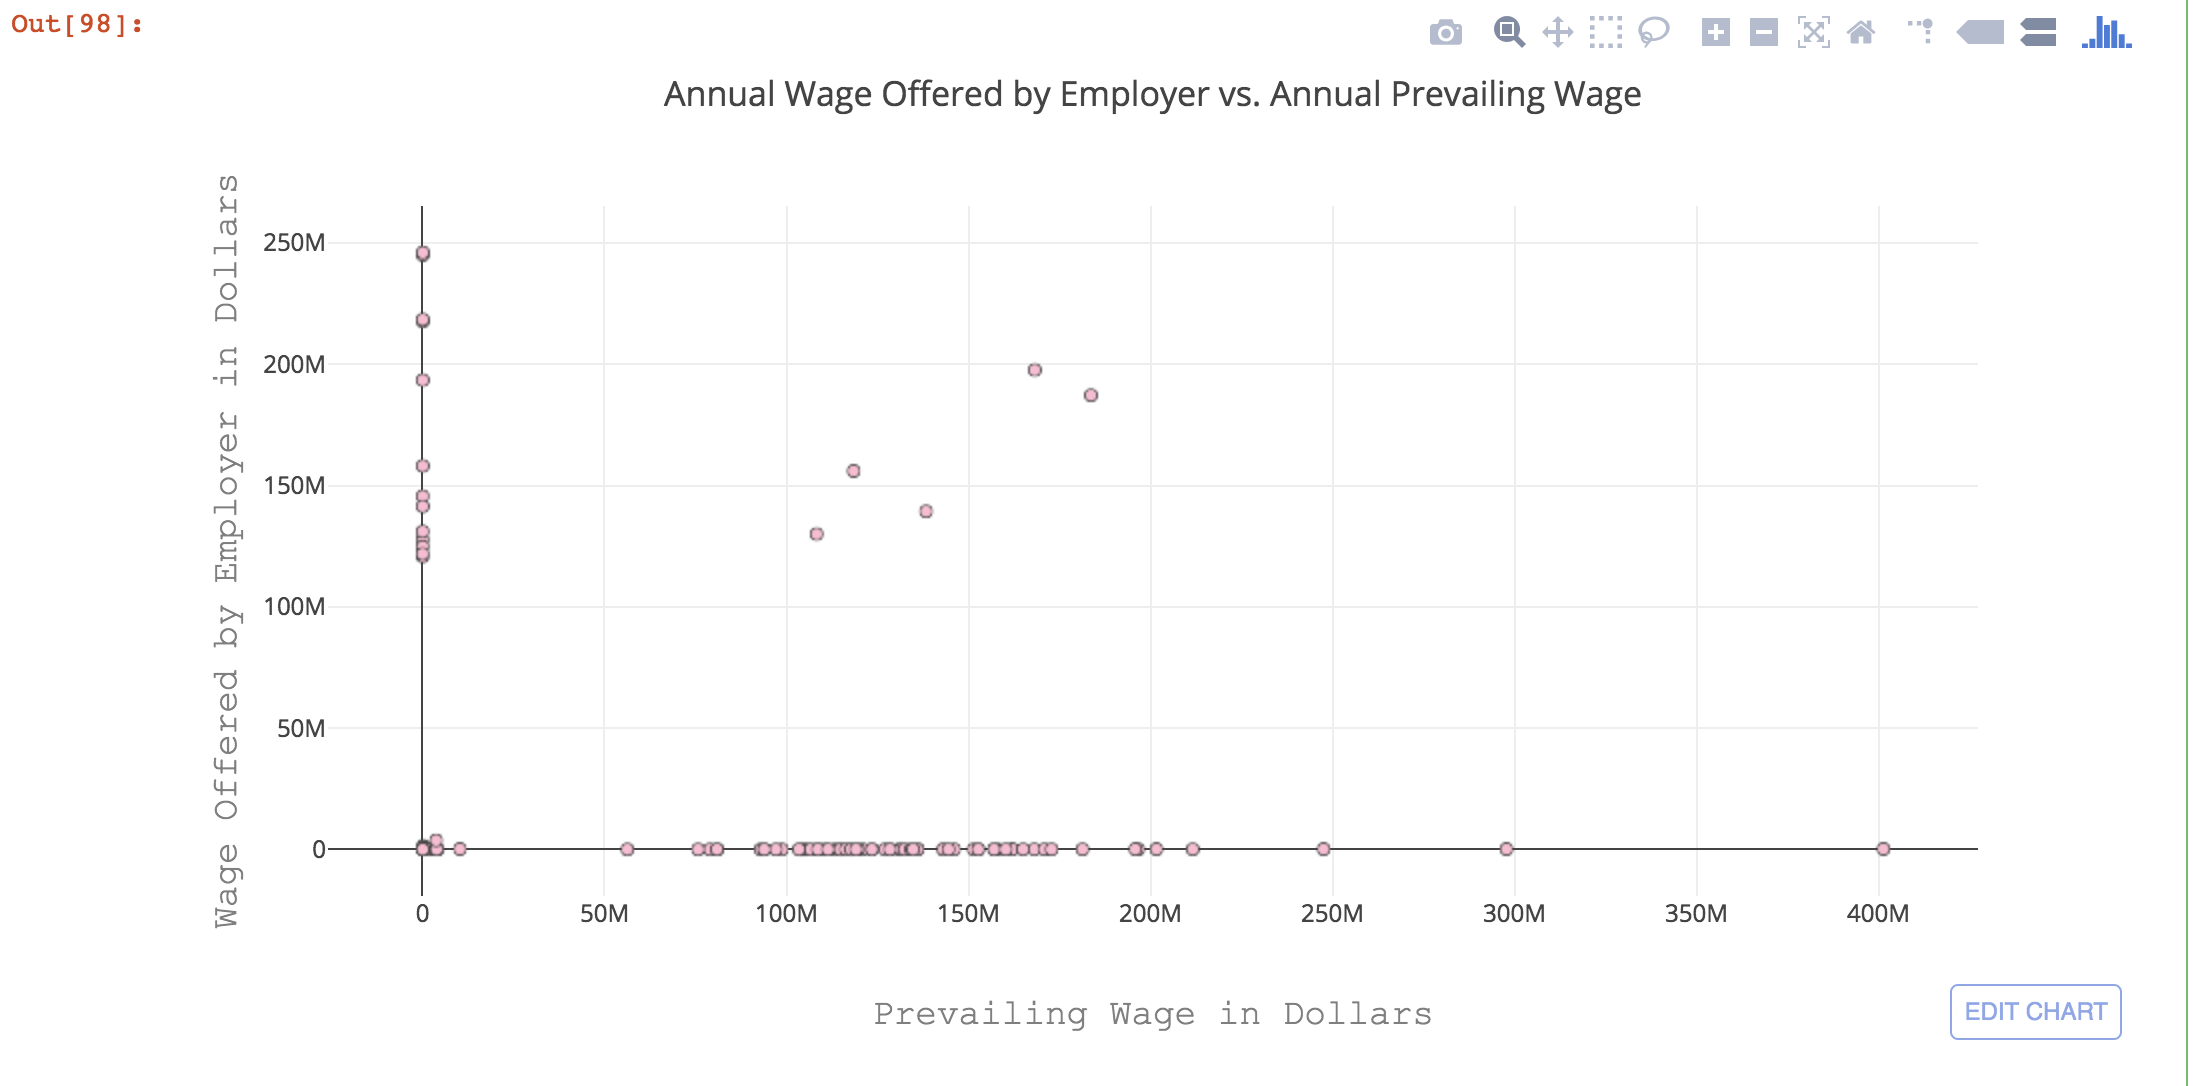

In [56]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from key import key
import plotly
from IPython.display import Image
from IPython.display import display

plotly.tools.set_credentials_file(username='spaturi', api_key=key)

trace = go.Scattergl(
    x = np.array(pw_year),    #Graph the prevailing wage with units year
    y = np.array(wage_year),  #Graph the wage offered with units year
    mode = 'markers',
    marker = dict(
        color = '#FFBAD2',
        line = dict(width = 1)
    )
)
layout = go.Layout(
    title='Annual Wage Offered by Employer vs. Annual Prevailing Wage',
    xaxis=dict(
        title='Prevailing Wage in Dollars',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Wage Offered by Employer in Dollars',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=[trace], layout=layout)

#py.iplot(fig)
Image("Annual_Wage_Graph.png")

It is clear from the graph above that there are outlier values in the prevailing wage axis.  There are some entries with a prevailing wage greater than 50 million.  These are not correct prevailing wages and should be removed from the data set.  However, when looking at the case status of these applications with a prevailing wage greater than 50 million below, it is seen that all the application are denied.  It can be hypothesized that an unrealistic prevailing wage listed can lead to an application denial.  Removing these rows would remove rows that recieved a denial status and make the data set even more unbalanced towards the certified entries.  Therefore, the outliers are kept because prevailing wage may be a large factor in the application case status.


In [57]:
for index, row in df.iterrows():
    if row['PW_UNIT_OF_PAY']=='Year':
        if float(row['PREVAILING_WAGE'])>50000000:
            print(row['PREVAILING_WAGE'], row['JOB_TITLE'], row['CASE_STATUS'])
    


152678240.0 SENIOR PROGRAMMER ANALYST DENIED
181319840.0 ASSURANCE MANAGER DENIED
111404800.0 TEST ENGINEER DENIED
56286880.0 REHAB COUNSELOR (DIRECT CARE PROFESSIONAL) DENIED
195813280.0 SR. QUALITY ASSURANCE ANALYST DENIED
144501760.0 PROGRAMMER ANALYST / SOFTWARE DEVELOPER DENIED
165008480.0 ORACLE DATABASE DEVELOPER DENIED
146059680.0 SOFTWARE ENGINEER/DEVELOPER DENIED
160249440.0 TECHNICAL WRITER DENIED
157048320.0 DATABASE ADMINISTRATOR DENIED
138357440.0 PROGRAMMER ANALYST(UI) DENIED
172839680.0 PROGRAMMER ANALYST DENIED
134811040.0 PROGRAMMER ANALYST DENIED
211604640.0 PR DIRECTOR DENIED
162067360.0 SENIOR SOFTWARE ENGINEER DENIED
170849120.0 SENIOR ANALYST DENIED
108636320.0 PROGRAMMER ANALYST DENIED
103417600.0 INSTRUCTOR DENIED
80903680.0 ARCHITECTURAL DESIGNER DENIED
143074880.0 AUTONOMOUS VEHICLE SYSTEMS ENGINEER DENIED
134205760.0 PROJECT MANAGER DENIED
93882880.0 COMPUTER PROGRAMMER DENIED
108288960.0 PRODUCT ANALYST DENIED
201622735.0 CONSULTANT LEVEL 3 DENIED
106645760

The following code cell displays the final dataframe after the data wrangling steps have concluded.  

In [58]:
df

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,EMPLOYER_COUNTRY,AGENT_REPRESENTING_EMPLOYER,AGENT_ATTORNEY_NAME,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,TOTAL_WORKERS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,PW_WAGE_LEVEL,PW_SOURCE,PW_SOURCE_YEAR,PW_SOURCE_OTHER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_DIFFERENCE,MAX_WAGE_INDICATOR,PREVAILING_WAGE_INDICATOR
0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2/24/2016,H-1B,8/10/2016,8/10/2019,DISCOVER PRODUCTS INC.,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",ASSOCIATE DATA INTEGRATION,15-1121,COMPUTER SYSTEMS ANALYSTS,Credit Card Issuing,1,1,0,0,0,0,0,Y,59197,Year,Level I,OES,2015,OFLC ONLINE DATA CENTER,65811,"67,320.00",Year,N,N,None,Y,RIVERWOODS,LAKE,IL,60015,6614.0,0,0
1,I-200-16064-557834,CERTIFIED-WITHDRAWN,3/4/2016,H-1B,8/16/2016,8/16/2019,DFS SERVICES LLC,2500 LAKE COOK ROAD,RIVERWOODS,IL,60015,UNITED STATES OF AMERICA,Y,"ELLSWORTH, CHAD",SENIOR ASSOCIATE,15-2031,OPERATIONS RESEARCH ANALYSTS,Credit Card Issuing,1,1,0,0,0,0,0,Y,49800,Year,None,Other,2015,TOWERS WATSON DATA SERVICES 2015 CSR PROFESSIO...,53000,"57,200.00",Year,N,N,None,Y,RIVERWOODS,LAKE,IL,60015,3200.0,0,0
2,I-200-16063-996093,CERTIFIED-WITHDRAWN,3/10/2016,H-1B,9/9/2016,9/9/2019,EASTBANC TECHNOLOGIES LLC,1211 31ST ST. NW,WASHINGTON,DC,20007,UNITED STATES OF AMERICA,Y,"BURKE, KAREN",.NET SOFTWARE PROGRAMMER,15-1131,COMPUTER PROGRAMMERS,Custom Computer Programming Services,2,2,0,0,0,0,0,Y,76502,Year,Level II,OES,2015,OFLC ONLINE DATA CENTER,77000,77000,Year,Y,N,Y,None,WASHINGTON,None,DC,20007,498.0,0,0
4,I-200-15053-636744,CERTIFIED-WITHDRAWN,2/22/2015,H-1B,3/1/2015,3/1/2018,BB&T CORPORATION,223 WEST NASH STREET,WILSON,NC,27893,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,13-2041,CREDIT ANALYSTS,Commercial Banking,1,0,0,0,0,1,0,Y,116605,Year,Level III,OES,2015,OFLC ONLINE DATA CENTER,132500,132500,Year,N,N,None,Y,NEW YORK,NEW YORK,NY,10036,15895.0,0,0
5,I-200-15071-336195,CERTIFIED-WITHDRAWN,3/12/2015,H-1B,9/11/2015,9/11/2018,"SUNTRUST BANKS, INC.","303 PEACHTREE STREET, NE",ATLANTA,GA,30308,UNITED STATES OF AMERICA,Y,"SCOFIELD, EILEEN",CREDIT RISK METRICS SPECIALIST,13-2099,"FINANCIAL SPECIALISTS, ALL OTHER",Commercial Banking,1,1,0,0,0,0,0,Y,59405,Year,Level III,OES,2015,OFLC ONLINE DATA CENTER,71750,71750,Year,N,N,None,Y,ATLANTA,FULTON,GA,30303,12345.0,0,0
6,I-200-16056-842817,CERTIFIED-WITHDRAWN,2/25/2016,H-1B,8/25/2016,8/24/2019,CITADEL INFORMATION SERVICES INC.,33 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,N,None,BUSINESS SYSTEMS ANALYST,13-1111,MANAGEMENT ANALYSTS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,52915,Year,Level I,Other,2015,ONLINE WAGE LIBRARY,61000,61000,Year,Y,N,Y,Y,EDISON,MIDDLESEX,NJ,08837,8085.0,0,0
7,I-200-16056-757335,CERTIFIED-WITHDRAWN,2/25/2016,H-1B,8/26/2016,8/25/2019,CITADEL INFORMATION SERVICES INC.,33 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,N,None,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,51730,Year,Level I,Other,2015,ONLINE WAGE LIBRARY,60500,60500,Year,Y,N,Y,Y,EDISON,MIDDLESEX,NJ,08837,8770.0,0,0
8,I-200-16058-469533,CERTIFIED-WITHDRAWN,2/27/2016,H-1B,8/26/2016,8/25/2019,CITADEL INFORMATION SERVICES INC.,33 WOOD AVENUE SOUTH,ISELIN,NJ,08830,UNITED STATES OF AMERICA,N,None,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,Custom Computer Programming Services,1,1,0,0,0,0,0,Y,58053,Year,Level I,Other,2015,ONLINE WAGE LIBRARY,60450,60450,Year,Y,N,Y,Y,NEW YORK,NEW YORK,NY,10005,2397.0,0,0
9,I-200-16059-084

In [59]:
accepter=df[df['CASE_STATUS']!='DENIED']
denier=df[df['CASE_STATUS']=='DENIED']


In [60]:
df.to_csv('cleaned.csv', mode = 'w', index=False)
